In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
auto = pd.read_csv(r'C:\Users\user\Desktop\Analiz\auto.csv')

print(auto.head())


   cylinders  displacement  horsepower  weight  acceleration  model_year  \
0          8         307.0       130.0  3504.0          12.0          70   
1          8         350.0       165.0  3693.0          11.5          70   
2          8         318.0       150.0  3436.0          11.0          70   
3          8         304.0       150.0  3433.0          12.0          70   
4          8         302.0       140.0  3449.0          10.5          70   

   origin   mpg  
0       1  18.0  
1       1  15.0  
2       1  18.0  
3       1  16.0  
4       1  17.0  


In [3]:
auto['ulke'] = auto.origin.replace([1,2,3],['USA','Europe','Japan'])
print(auto.head())
print(auto.index)
print(auto.columns) 

   cylinders  displacement  horsepower  weight  acceleration  model_year  \
0          8         307.0       130.0  3504.0          12.0          70   
1          8         350.0       165.0  3693.0          11.5          70   
2          8         318.0       150.0  3436.0          11.0          70   
3          8         304.0       150.0  3433.0          12.0          70   
4          8         302.0       140.0  3449.0          10.5          70   

   origin   mpg ulke  
0       1  18.0  USA  
1       1  15.0  USA  
2       1  18.0  USA  
3       1  16.0  USA  
4       1  17.0  USA  
RangeIndex(start=0, stop=392, step=1)
Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin', 'mpg', 'ulke'],
      dtype='object')


In [4]:
auto.shape #boyut baktık

(392, 9)

In [5]:
auto.isnull() #boş veri var mı?

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg,ulke
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
387,False,False,False,False,False,False,False,False,False
388,False,False,False,False,False,False,False,False,False
389,False,False,False,False,False,False,False,False,False
390,False,False,False,False,False,False,False,False,False


In [6]:
auto.dtypes # data tiplerimize baktık 

cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
mpg             float64
ulke             object
dtype: object

In [7]:
auto.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [8]:
auto = auto[auto.horsepower!='?']
print('?'in auto.horsepower)


False


In [9]:
auto.horsepower = auto.horsepower.astype('float')
auto.dtypes
#Burada hp'nin veri tipini değiştirdik 


cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
mpg             float64
ulke             object
dtype: object

In [10]:
auto.describe()
#veri ile alakalı kısa bir özet tablosu 


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,23.445918
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,7.805007
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,17.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,22.750000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

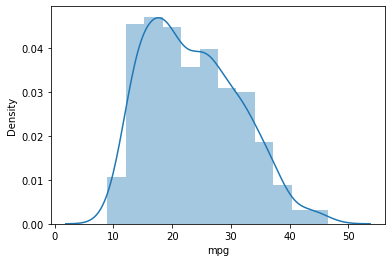

In [11]:
sns.distplot(auto['mpg']) 
#'mpg' sütündaki verilerin dağılımı

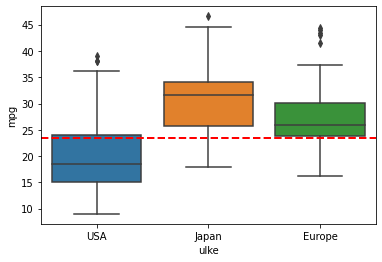

In [12]:
fig = sns.boxplot(x='ulke', y='mpg', data=auto)
plt.axhline(auto.mpg.mean(),color='r',linestyle='dashed',linewidth=2)
#kutu grafik çizdirme 

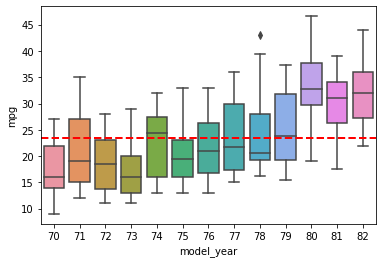

In [13]:
fig = sns.boxplot(x='model_year', y='mpg', data=auto)
plt.axhline(auto.mpg.mean(),color='r',linestyle ='dashed',linewidth=2)

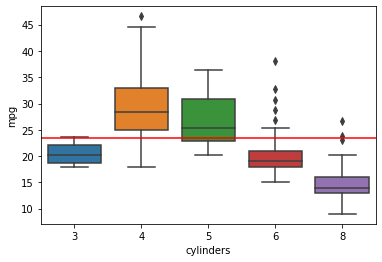

In [14]:
fig = sns.boxplot(x='cylinders', y='mpg', data=auto)
plt.axhline(auto.mpg.mean(), color='r',linestyle = 'solid')

<AxesSubplot:>

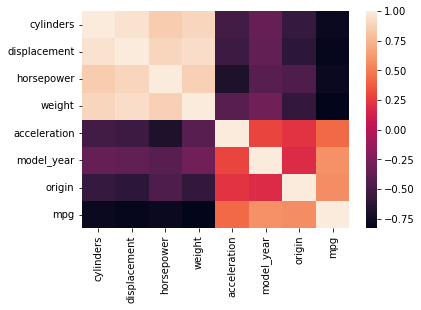

In [15]:
korelasyonmatrisi = auto.corr()
sns.heatmap(korelasyonmatrisi)
#korlasyon matrisinin görselleştirlimesi 

<AxesSubplot:>

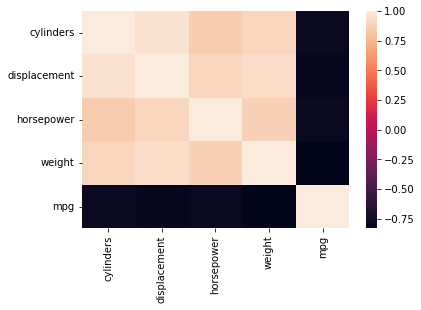

In [16]:
faktor = ['cylinders','displacement','horsepower','weight','mpg']
korelasyonmatrisi = auto[faktor].corr()
sns.heatmap(korelasyonmatrisi)

#Belirli gruplar için korelasyon görselleştirmesi

In [17]:
X = pd.DataFrame(auto['horsepower'])#girdi matris sütünu
X = sm.add_constant(X) #beta 0 için matrise 1 lerin eklenmesi
y=auto['mpg'] #bağımlı değişkenlerin tanımlnaması
lineerModel = sm.regression.linear_model.OLS(y,X) #model obje yaratılması 
fit = lineerModel.fit()#modelin uydurulması 
fit.summary()#modelin istatistiksel sonuçlarının eldesi 

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           7.03e-81
Time:                        15:10:40   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
predNew = fit.get_prediction([1,98]) #modele dayalı beygir gücü 98 olan bir arabanın mpg değeri
predNew.summary_frame(alpha=0.05)# güven aralığı %95 ve tahmin aralığı 


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


In [19]:
X = pd.DataFrame(auto.iloc[:,1:8]) # girdi matrisinin sütunları
X = sm.add_constant(X) # beta_0 için 1'lerin eklenmesi
y = auto['mpg'] # bağımlı değişkenin tanımnlanması
cokluDogrusalModel = sm.regression.linear_model.OLS(y, X) # model objesinin yaratılması
cokluDogrusalModelFit = cokluDogrusalModel.fit() # modelin uydurulması
cokluDogrusalModelFit.summary() # modelin istatistiklerinin ve ayrıntılarının sunulduğu özeti



C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.202e+30
Date:                Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:10:40   Log-Likelihood:                 11548.
No. Observations:                 392   AIC:                        -2.308e+04
Df Residuals:                     384   BIC:                        -2.305e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.128e-14   5.51e-14     -1.112      0.267    -1.7e-13    4.71e-14
displacement  2.914e-16   6.68e-17      4.361      0.000     1.6e-16    4.23e-16
horsepower   -2.082e-16   1.62e-16     -1.286      0.199   -5.26e-16     1.1e-16
weight       -1.979e-17   8.61e-18     -2.298      0.022   -3.67e-17   -2.86e-18
acceleration  4.718e-16   1.17e-15      0.404      0.686   -1.82e-15    2.77e-15
model_year    6.106e-16   7.53e-16      0.811      0.418    -8.7e-16    2.09e-15
origin       -3.553e-15   3.37e-15     -1.053      0.293   -1.02e-14    3.08e-15
mpg              1.0000   6.01e-16   1.66e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                        2.067   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.356   Jarque-Bera (JB):                1.871
Skew:                          -0.098   Prob(JB):                        0.392
Kurtosis:                       3.276   Cond. No.                     8.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""